In [1]:
import pandas as pd

# Veri setini yükleme (Dosyanın yolunu değiştirin ve ayraç belirtin)
veri_seti = pd.read_csv("human_motion_detection.csv", sep=';')

# Label encoding işlemi için LabelEncoder kullanma
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
veri_seti['Output'] = label_encoder.fit_transform(veri_seti['Output'])
veri_seti.to_csv('humanencode.csv', index=False)


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Veri setini oku
veri_seti = pd.read_csv('humanencode.csv')


# Verilerin standardizasyonunu yap
scaler = StandardScaler()
standardize_veri = scaler.fit_transform(veri_seti)

# Standardize edilmiş veriyi yeni bir DataFrame'e dönüştür
standardize_veri_df = pd.DataFrame(standardize_veri, columns=veri_seti.columns)

# Yeni Excel dosyasına kaydet
standardize_veri_df.to_csv('standardize_edilmis_veri.csv', index=False)


In [4]:
import pandas as pd

# Veri setini oku
veri_seti = pd.read_csv('standardize_edilmis_veri.csv') # Eğer dosyanız tablo şeklinde ise

# Yeni özellikleri hesapla ve tabloya ekle
veri_seti['mean_gyro'] = veri_seti[['gyro_x', 'gyro_y', 'gyro_z']].mean(axis=1)
veri_seti['mean_accel'] = veri_seti[['accel_x', 'accel_y', 'accel_z']].mean(axis=1)

# Yeni veri setini Excel dosyasına kaydet
veri_seti.to_csv('humanact_yeni_ozellikler.csv', index=False)

In [9]:
import pandas as pd

# Veri setini yükleme
veri = pd.read_csv('humanact_yeni_ozellikler.csv')

# Tüm verilerin istatistiksel bilgilerini almak
istatistikler = veri.describe()

# İstatistiksel bilgileri ekrana yazdırma
print(istatistikler)

             gyro_x        gyro_y        gyro_z       accel_x       accel_y  \
count  3.716100e+04  3.716100e+04  3.716100e+04  3.716100e+04  3.716100e+04   
mean  -3.671166e-17  7.648263e-18 -4.894888e-17 -6.424541e-17 -9.177915e-18   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -2.781549e+00 -6.512701e+00 -1.560251e+00 -2.364429e+00 -3.192054e+00   
25%   -4.995553e-01 -4.410107e-01 -5.505163e-01 -7.673665e-01 -3.601415e-01   
50%   -3.479299e-01  2.873016e-01 -4.927099e-01  2.024918e-01 -1.525067e-01   
75%    5.472308e-01  3.983367e-01  3.357232e-01  3.828690e-01  7.100930e-01   
max    8.219161e+00  5.494575e+00  4.044904e+00  2.679050e+00  2.226387e+00   

            accel_z    std_acc_30   std_gyro_10   mean_acc_20  mean_gyro_20  \
count  3.716100e+04  3.716100e+04  3.716100e+04  3.716100e+04  3.716100e+04   
mean  -1.223722e-17  2.080327e-16 -2.080327e-16  3.059305e-17  4.894888e-17   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.

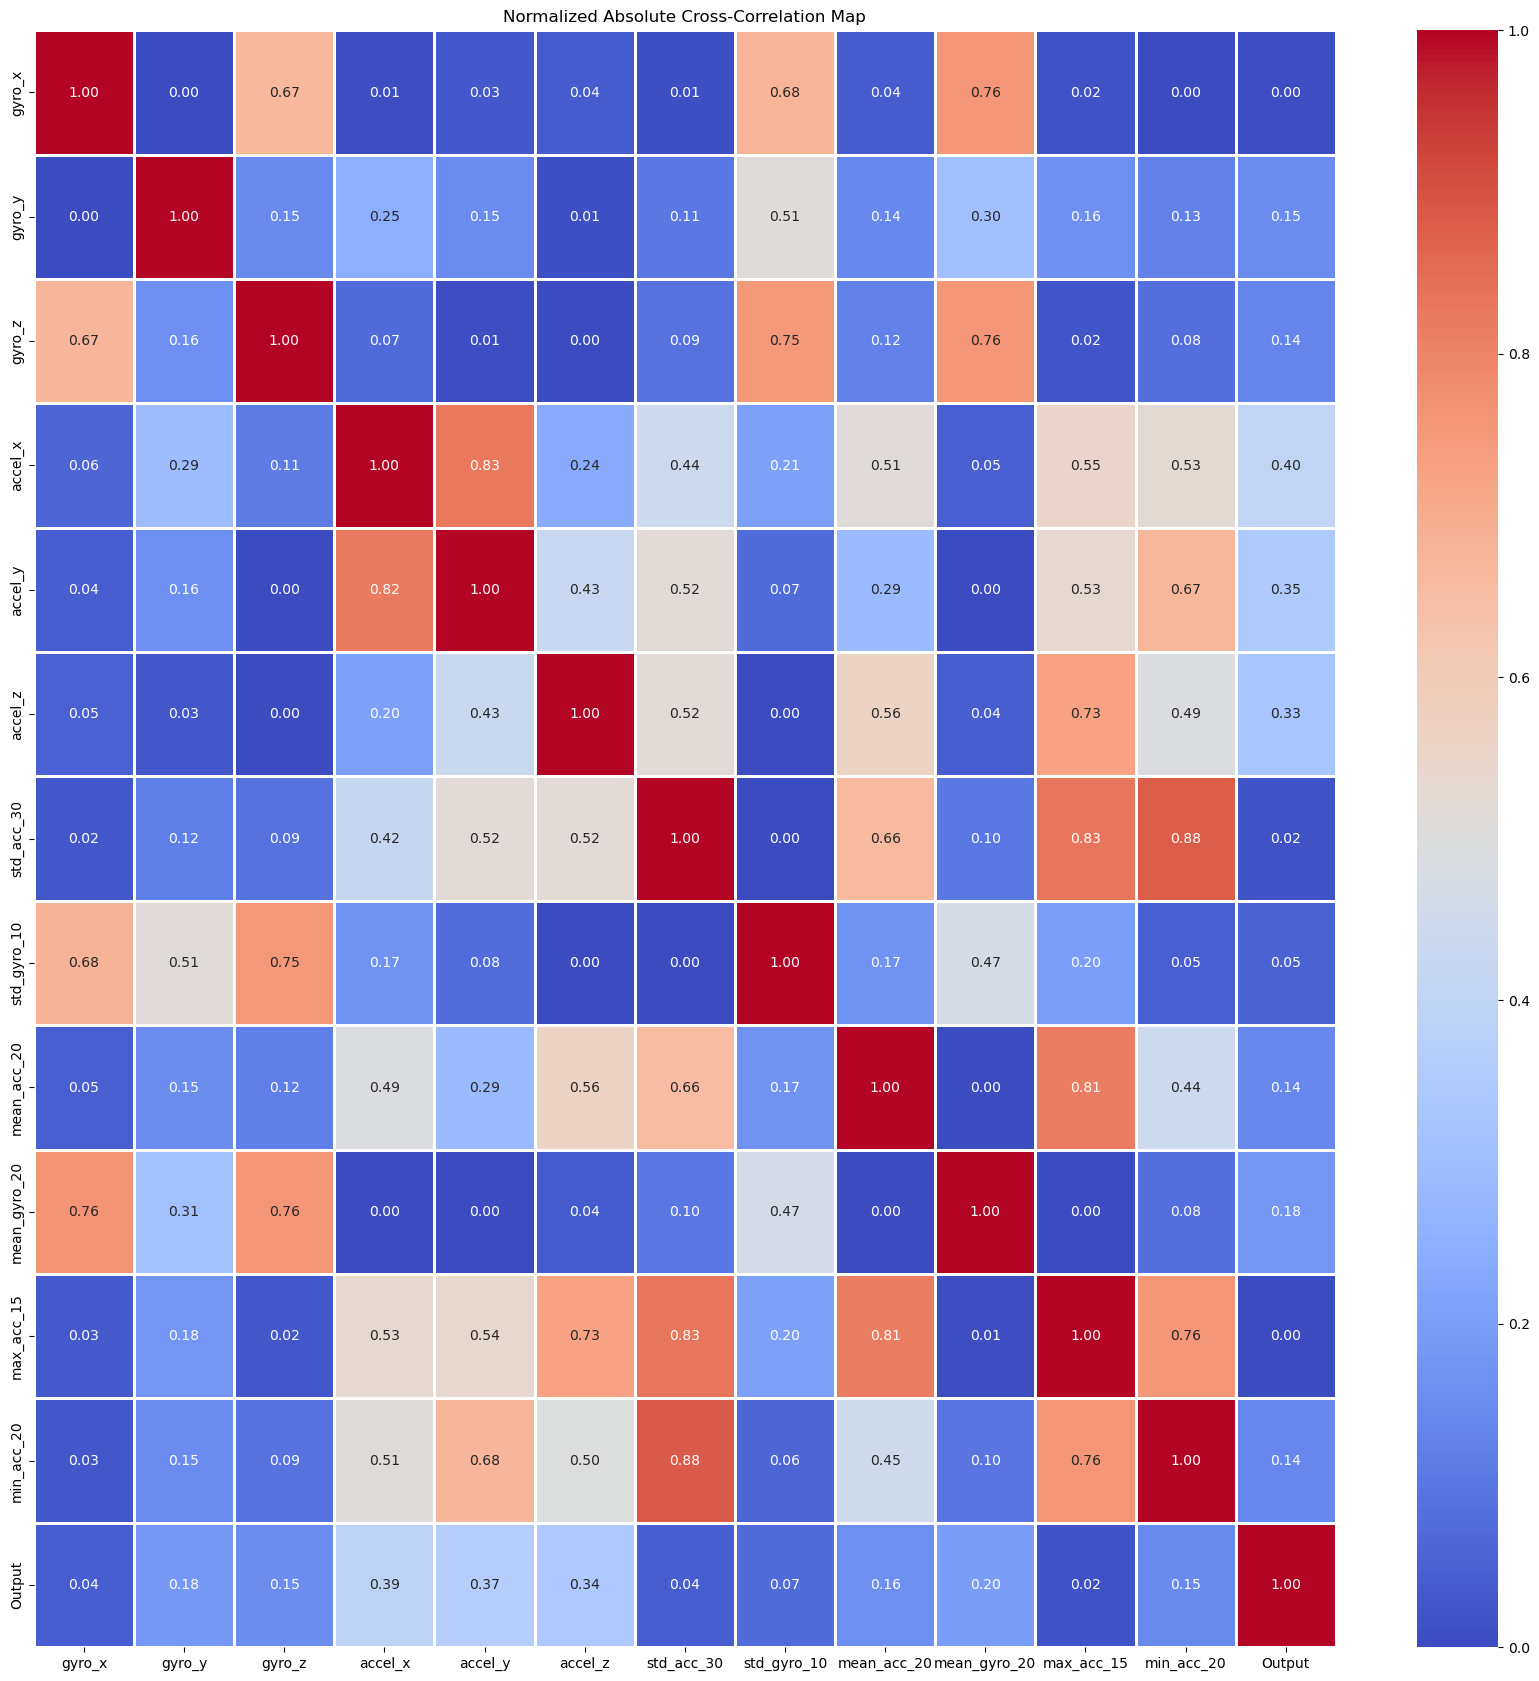

In [11]:
import pandas,numpy,seaborn
import matplotlib.pyplot as plot

dataset = pandas.read_csv('standardize_edilmis_veri.csv')

correlation_of_dataset = dataset.corr()

absolute_of_corr = numpy.abs(correlation_of_dataset)
normalized_corr = (absolute_of_corr - absolute_of_corr.min()) / (absolute_of_corr.max() - absolute_of_corr.min())

plot.figure(figsize=(21,21))
seaborn.heatmap(normalized_corr, annot=True, cmap='coolwarm', vmin=0, vmax=1, fmt='.2f', annot_kws={'size':10}, linewidth=.9)
plot.title('Normalized Absolute Cross-Correlation Map')
plot.show()

In [3]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
import joblib

# Veri setini yükle
data = pd.read_csv('standardize_edilmis_veri.csv')

#boşlukları doldurma
data = data.fillna(data.mean(numeric_only=True))

# Bağımsız değişkenler ve hedef değişkeni ayır
X = data.drop('Output', axis=1)
y = data['Output']

# Kullanılacak modelleri tanımla
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet()
}

# Her model için performansı değerlendir ve en iyisini seç
best_model = None
best_score = float('-inf')
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
    mean_r2 = cv_scores.mean()
    print(f"{name} cross-validation mean R^2 score:", mean_r2)
    if mean_r2 > best_score:
        best_score = mean_r2
        best_model = model

# En iyi modeli eğit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
best_model.fit(X_train, y_train)

# Eğitim setinde performansı değerlendir
train_predictions = best_model.predict(X_train)
train_r2 = r2_score(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_mae = mean_absolute_error(y_train, train_predictions)
train_rmse = sqrt(train_mse)
print("\nEğitim Seti Performansı:")
print("R^2 değeri:", train_r2)
print("MSE (Ortalama Kare Hata):", train_mse)
print("MAE (Ortalama Mutlak Hata):", train_mae)
print("RMSE (Kök Ortalama Kare Hata):", train_rmse)

# Test setinde performansı değerlendir
test_predictions = best_model.predict(X_test)
test_r2 = r2_score(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = sqrt(test_mse)
print("\nTest Seti Performansı:")
print("R^2 değeri:", test_r2)
print("MSE (Ortalama Kare Hata):", test_mse)
print("MAE (Ortalama Mutlak Hata):", test_mae)
print("RMSE (Kök Ortalama Kare Hata):", test_rmse)

# En iyi modeli kaydet
joblib.dump(best_model, 'best_model_isedataset_regression.pkl')

Linear Regression cross-validation mean R^2 score: -9.420586485842961e+30
Ridge Regression cross-validation mean R^2 score: -9.418290868695844e+30
Lasso Regression cross-validation mean R^2 score: -1.5822882966435622e+31
ElasticNet Regression cross-validation mean R^2 score: -1.5822882966435622e+31

Eğitim Seti Performansı:
R^2 değeri: 0.6118635282989947
MSE (Ortalama Kare Hata): 0.387919851481853
MAE (Ortalama Mutlak Hata): 0.5034694059627493
RMSE (Kök Ortalama Kare Hata): 0.6228321214274782

Test Seti Performansı:
R^2 değeri: 0.6192578860704971
MSE (Ortalama Kare Hata): 0.38145289573180846
MAE (Ortalama Mutlak Hata): 0.49718349744821677
RMSE (Kök Ortalama Kare Hata): 0.6176187300688091


['best_model_isedataset_regression.pkl']

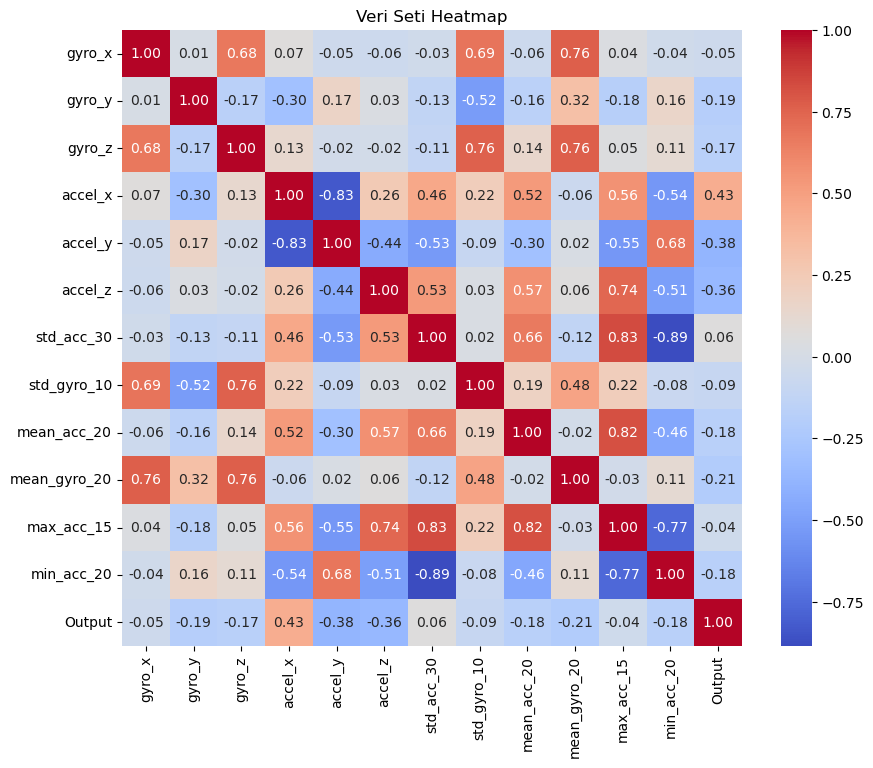

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini Excel dosyasından oku
data = pd.read_csv('standardize_edilmis_veri.csv')

# Heatmap'i oluşturmak için korelasyon matrisini hesapla
correlation_matrix = data.corr()

# Heatmap'i çiz
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Veri Seti Heatmap')
plt.show()


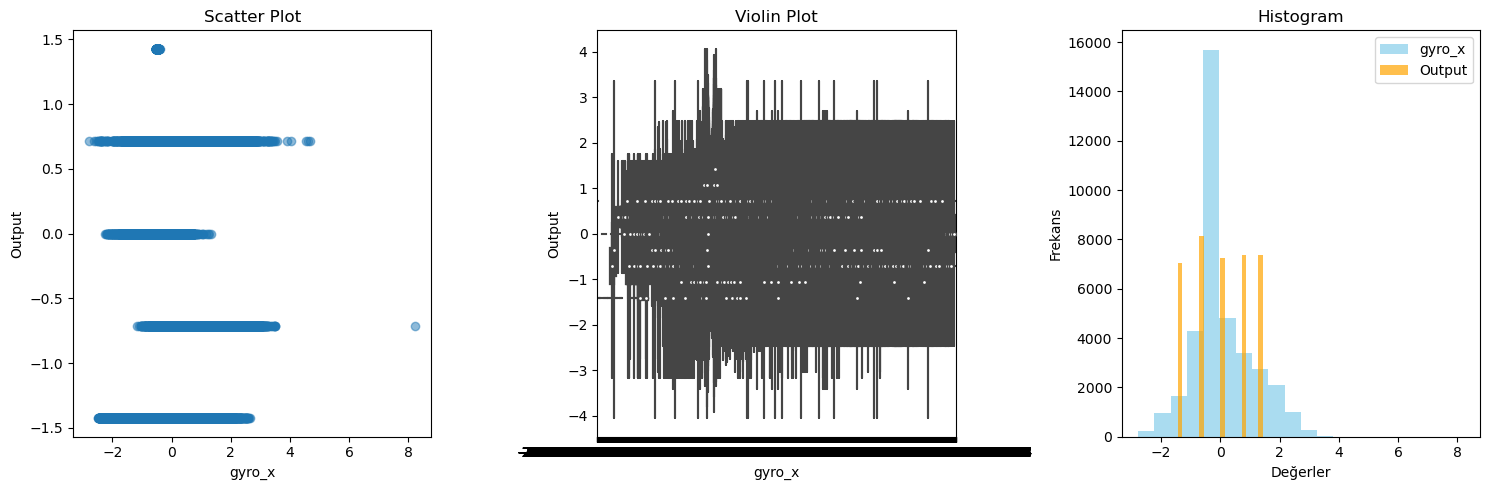

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_csv('standardize_edilmis_veri.csv')

# Grafikleri oluşturma
plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['gyro_x'], data['Output'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('gyro_x')
plt.ylabel('Output')

# Violin plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['gyro_x'], y=data['Output'])
plt.title('Violin Plot')
plt.xlabel('gyro_x')
plt.ylabel('Output')

# Histogram
plt.subplot(1, 3, 3)
plt.hist(data['gyro_x'], bins=20, color='skyblue', alpha=0.7, label='gyro_x')
plt.hist(data['Output'], bins=20, color='orange', alpha=0.7, label='Output')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

plt.tight_layout()
plt.show()


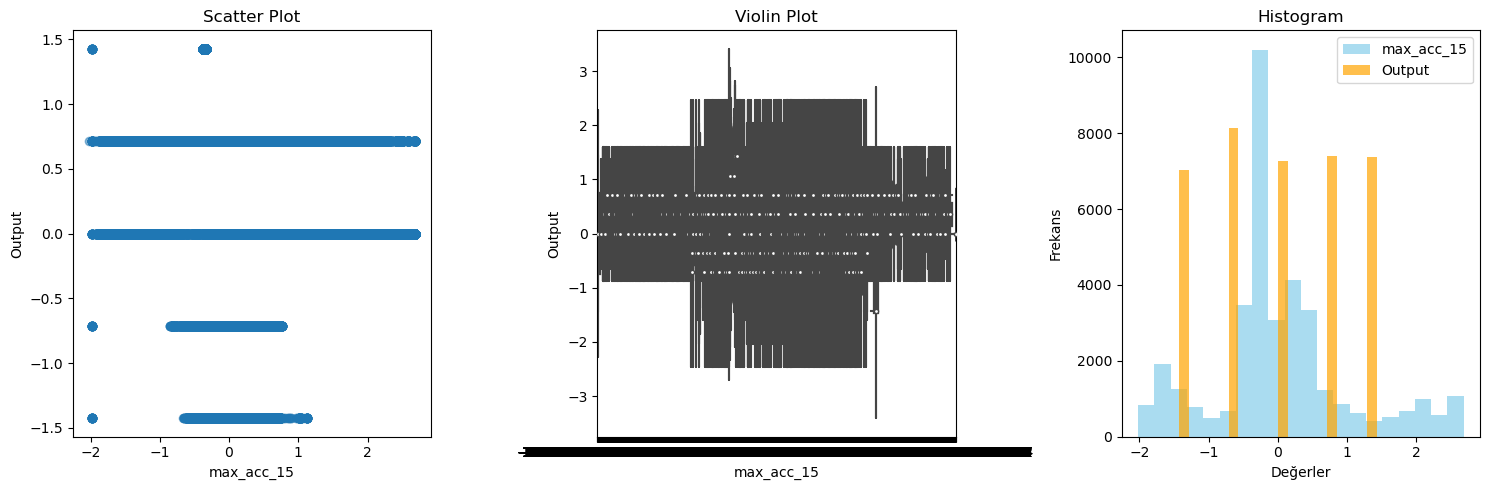

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
data = pd.read_csv('standardize_edilmis_veri.csv')

# Grafikleri oluşturma
plt.figure(figsize=(15, 5))

# Scatter plot
plt.subplot(1, 3, 1)
plt.scatter(data['max_acc_15'], data['Output'], alpha=0.5)
plt.title('Scatter Plot')
plt.xlabel('max_acc_15')
plt.ylabel('Output')

# Violin plot
plt.subplot(1, 3, 2)
sns.violinplot(x=data['max_acc_15'], y=data['Output'])
plt.title('Violin Plot')
plt.xlabel('max_acc_15')
plt.ylabel('Output')

# Histogram
plt.subplot(1, 3, 3)
plt.hist(data['max_acc_15'], bins=20, color='skyblue', alpha=0.7, label='max_acc_15')
plt.hist(data['Output'], bins=20, color='orange', alpha=0.7, label='Output')
plt.title('Histogram')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.legend()

plt.tight_layout()
plt.show()
